# Import Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Import & Pengolahan Dataset

In [2]:
dtrina = pd.read_csv('customer_data.csv')

In [3]:
dtrina

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780
...,...,...,...,...,...,...,...,...
995,Jason Haas,42,Female,PhD,98170,Bosnia and Herzegovina,0.7,17435.950
996,Sharon Valdez,39,Male,High School,59174,Eritrea,0.9,11662.830
997,Andrew Taylor,50,Male,Master,59808,Serbia,0.4,7196.160
998,Jessica Johnson,50,Female,Master,58272,Cyprus,0.7,13939.520


In [4]:
dtrina.shape

(1000, 8)

In [5]:
dtrina.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [6]:
dtrina.tail()

,name,age,gender,education,income,country,purchase_frequency,spending
995,Jason Haas,42,Female,PhD,98170,Bosnia and Herzegovina,0.7,17435.95
996,Sharon Valdez,39,Male,High School,59174,Eritrea,0.9,11662.83
997,Andrew Taylor,50,Male,Master,59808,Serbia,0.4,7196.16
998,Jessica Johnson,50,Female,Master,58272,Cyprus,0.7,13939.52
999,Brian Williams,38,Female,Bachelor,32512,Turkey,0.5,8312.80


In [7]:
dtrina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [8]:
dtrina.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,41.754000,13.778582,18.000,30.000,42.000,54.0000,65.0
income,1000.0,59277.852000,23258.377128,20031.000,38825.500,58972.000,79114.0000,99780.0
purchase_frequency,1000.0,0.554600,0.284675,0.100,0.300,0.600,0.8000,1.0
spending,1000.0,9613.296835,5484.707210,611.985,5020.425,9430.395,13645.5075,25546.5


In [9]:
# no null values

dtrina.isna().sum()

name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64

In [10]:
# No duplicates

dtrina.duplicated().sum()

0

In [11]:
# Drop 'name' column

dtrina.drop(['name'], axis=1, inplace=True)

In [12]:
dtrina.gender.value_counts()

Male      501
Female    499
Name: gender, dtype: int64

In [13]:
dtrina.education.value_counts()

Bachelor       271
PhD            248
High School    245
Master         236
Name: education, dtype: int64

In [14]:
dtrina.country.value_counts()

Congo                12
Palau                11
Slovenia             10
Algeria               9
Ukraine               9
                     ..
Equatorial Guinea     1
Solomon Islands       1
Niger                 1
Botswana              1
Sudan                 1
Name: country, Length: 239, dtype: int64

In [15]:
dtrina.country.nunique()

239

In [16]:
num_col = dtrina.select_dtypes(include=np.number)

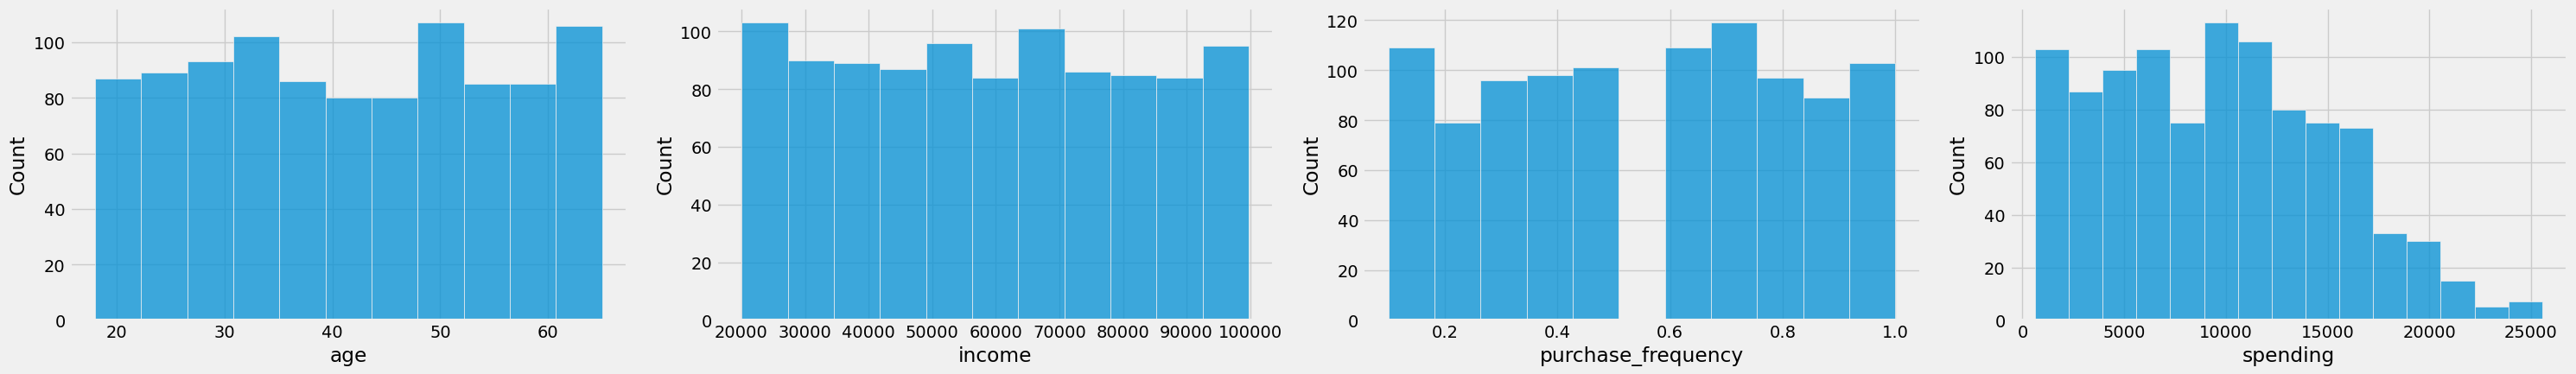

In [17]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30,30))
for index,column in enumerate(num_col):
    plt.subplot(7,4,index+1)
    sns.histplot(data=num_col,x=column)
    
plt.tight_layout(pad = 1.0)

tidak ada outliers

# Explorasi Data

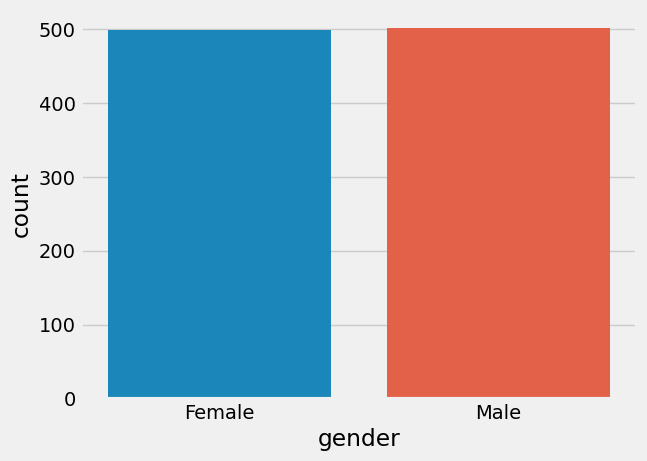

In [18]:
sns.countplot(x='gender', data=dtrina)
plt.show()

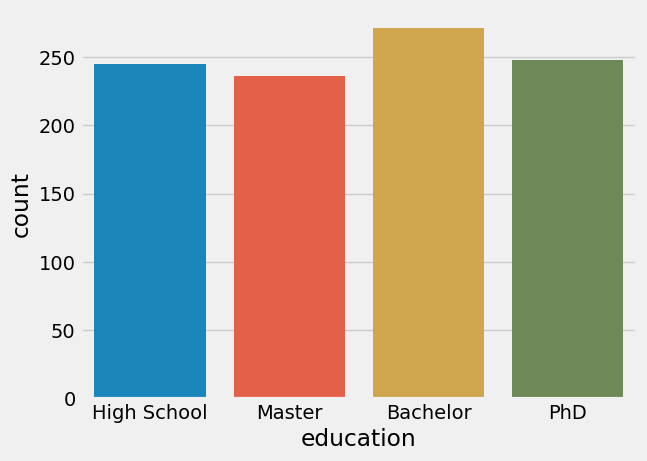

In [19]:
sns.countplot(x='education', data=dtrina)
plt.show()

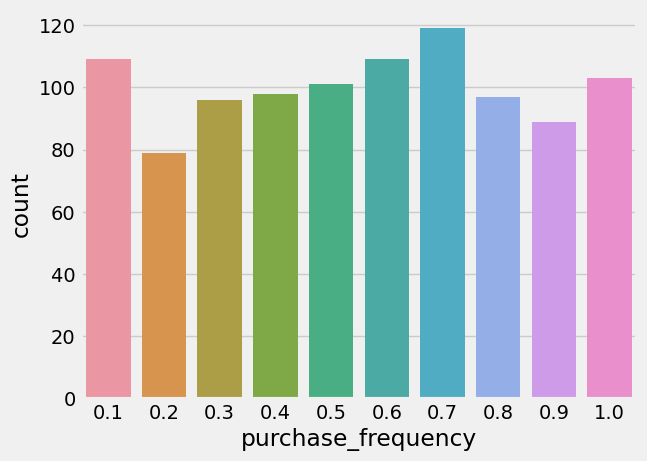

In [20]:
sns.countplot(x='purchase_frequency', data=dtrina)
plt.show()

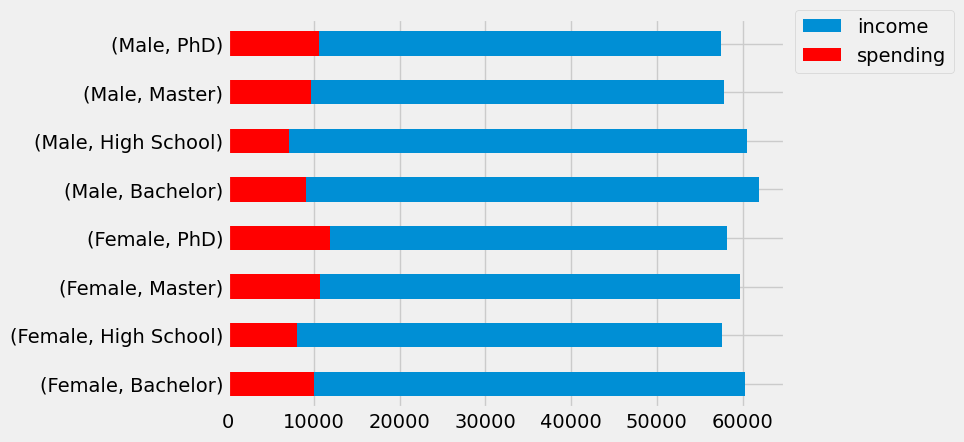

In [21]:
dtrina.groupby(['gender','education'])['income'].mean().plot(kind='barh')
dtrina.groupby(['gender','education'])['spending'].mean().plot(kind='barh', color='red')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.05))
plt.ylabel('')
plt.show()

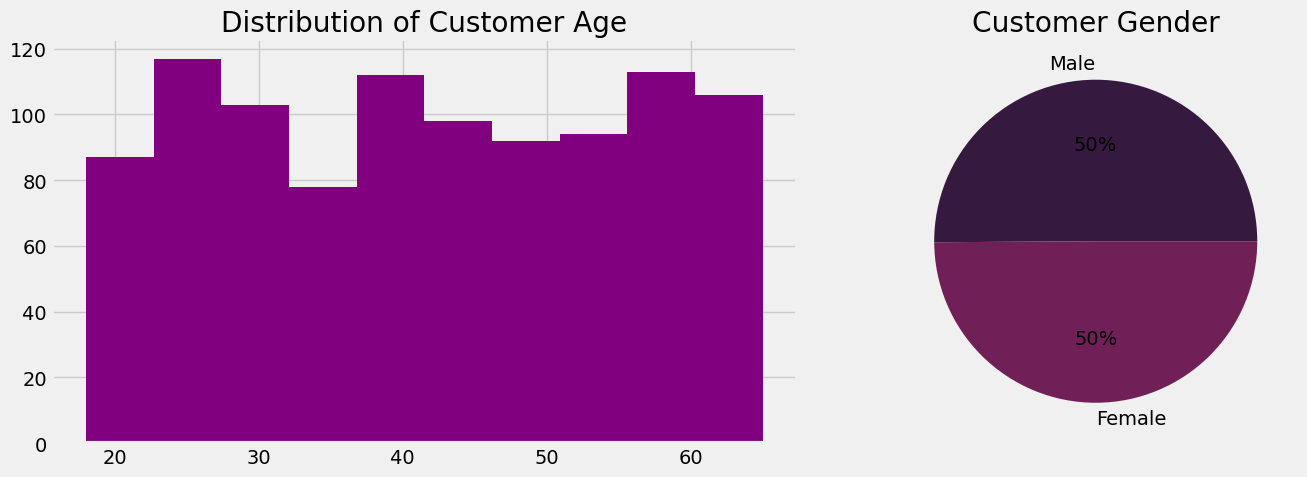

In [22]:
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
palette_color = sns.color_palette('rocket')
ax[0].hist(x=dtrina['age'],color='purple')
ax[0].set_title("Distribution of Customer Age")
ax[1].pie(dtrina['gender'].value_counts(),autopct='%1.f%%',colors=palette_color,labels=['Male','Female'])
ax[1].set_title("Customer Gender")
plt.tight_layout();

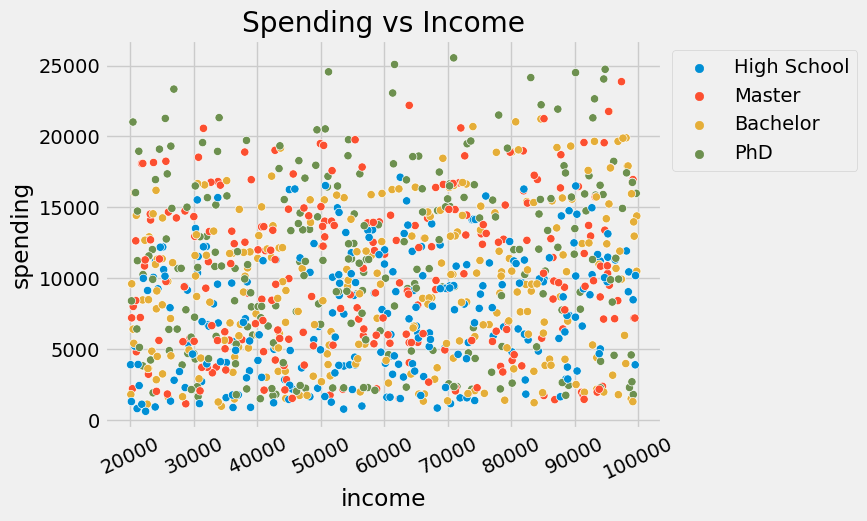

In [23]:
sns.scatterplot(data=dtrina, x='income', y='spending', hue='education')

plt.title('Spending vs Income')
plt.xticks(rotation = 25)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

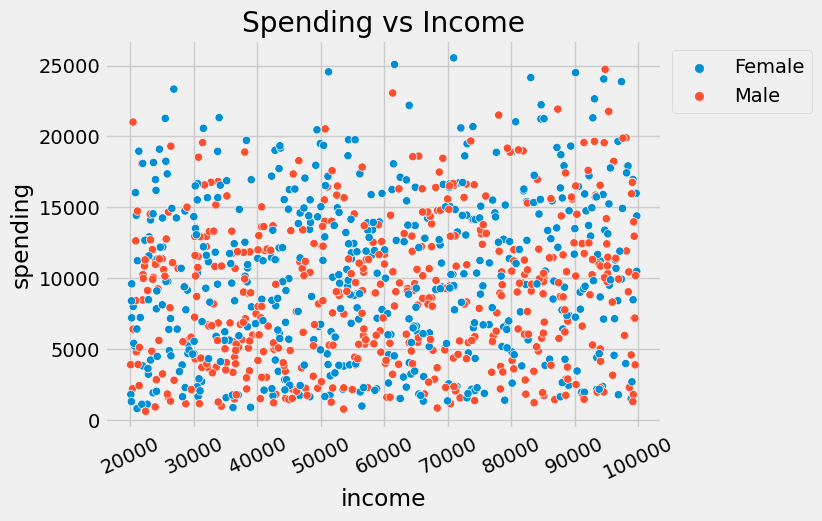

In [24]:
sns.scatterplot(data=dtrina, x='income', y='spending', hue='gender')

plt.title('Spending vs Income')
plt.xticks(rotation = 25)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [25]:
corr = dtrina['spending'].corr(dtrina['income'])

print('korelasi antara pengeluaran dan pendapatan: ', corr)

korelasi antara pengeluaran dan pendapatan:  0.1228507338361735


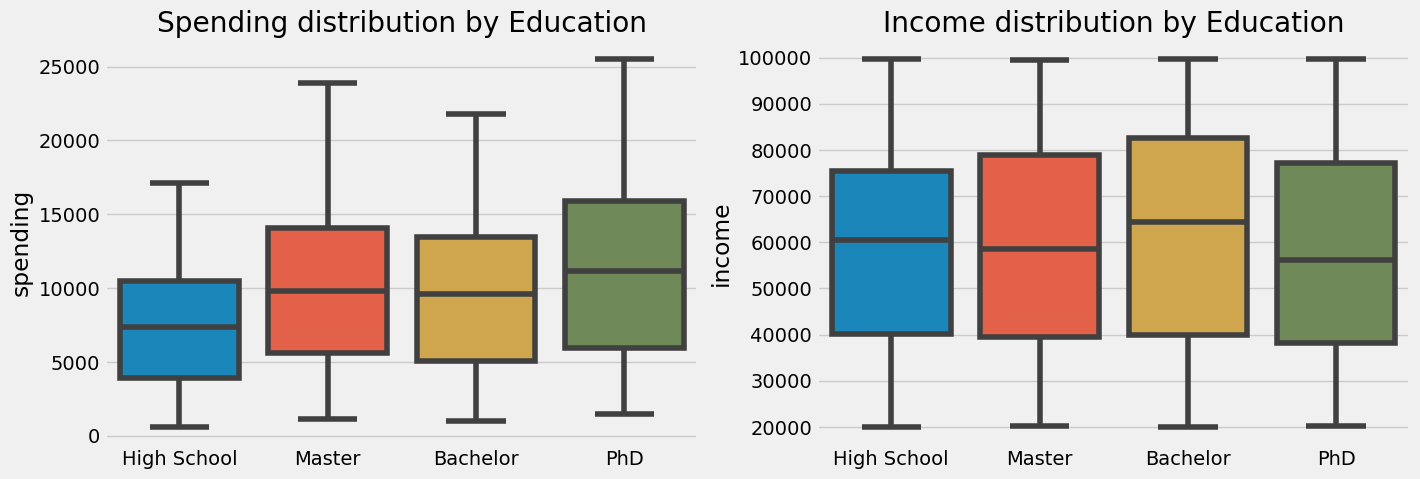

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(x='education', y='spending', data=dtrina)
plt.xlabel('')
plt.title('Spending distribution by Education')

plt.subplot(1,2,2)
sns.boxplot(x='education', y='income', data=dtrina)
plt.xlabel('')
plt.title('Income distribution by Education')
plt.show()

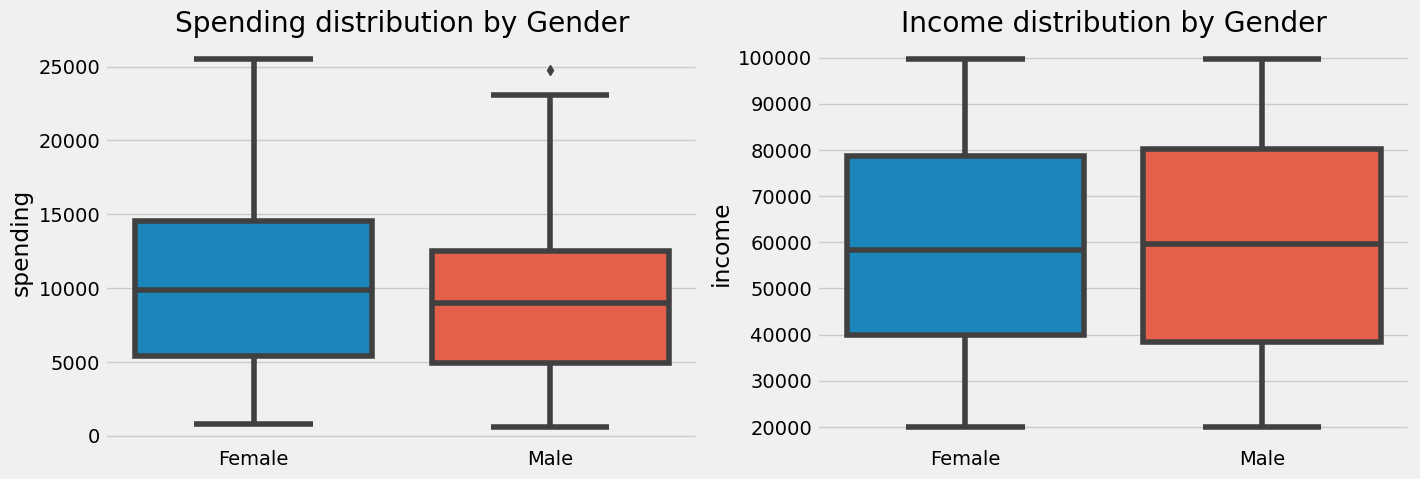

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(x='gender', y='spending', data=dtrina)
plt.xlabel('')
plt.title('Spending distribution by Gender')

plt.subplot(1,2,2)
sns.boxplot(x='gender', y='income', data=dtrina)
plt.xlabel('')
plt.title('Income distribution by Gender')
plt.show()

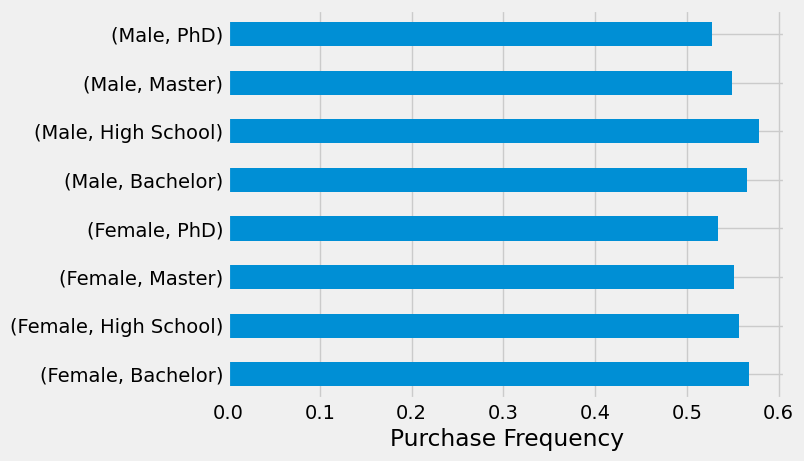

In [28]:
dtrina.groupby(['gender','education'])['purchase_frequency'].mean().plot(kind='barh', legend=None)

plt.xlabel('Purchase Frequency')
plt.ylabel('')
plt.show()

# Encoding

In [29]:
dtrina_copy = dtrina

In [30]:
dtrina_copy = pd.get_dummies(dtrina_copy, columns=['gender','education'])

In [31]:
dtrina_copy.drop(['country'], axis=1, inplace=True)

In [32]:
dtrina_copy.head()

,age,income,purchase_frequency,spending,gender_Female,gender_Male,education_Bachelor,education_High School,education_Master,education_PhD
0,42,53936,0.9,13227.120,1,0,0,1,0,0
1,49,82468,0.6,12674.040,1,0,0,0,1,0
2,55,56941,0.3,5354.115,0,1,1,0,0,0
3,24,60651,0.2,2606.510,1,0,1,0,0,0
4,64,81884,0.9,18984.780,0,1,0,0,1,0


# Standardization

In [33]:
minmax = MinMaxScaler()

In [34]:
dtrina_copy[dtrina_copy.columns] = minmax.fit_transform(dtrina_copy)

In [35]:
dtrina_copy = dtrina_copy.reset_index(drop=True)
dtrina_copy.head()

,age,income,purchase_frequency,spending,gender_Female,gender_Male,education_Bachelor,education_High School,education_Master,education_PhD
0,0.510638,0.425146,0.888889,0.505931,1.0,0.0,0.0,1.0,0.0,0.0
1,0.659574,0.782919,0.555556,0.483749,1.0,0.0,0.0,0.0,1.0,0.0
2,0.787234,0.462827,0.222222,0.190183,0.0,1.0,1.0,0.0,0.0,0.0
3,0.127660,0.509348,0.111111,0.079991,1.0,0.0,1.0,0.0,0.0,0.0
4,0.978723,0.775596,0.888889,0.736842,0.0,1.0,0.0,0.0,1.0,0.0


# Modeling

# PCA

In [36]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(dtrina_copy)

principaldtrina = pd.DataFrame(data = principalComponents
          , columns = ['principal component 1', 'principal component 2'])

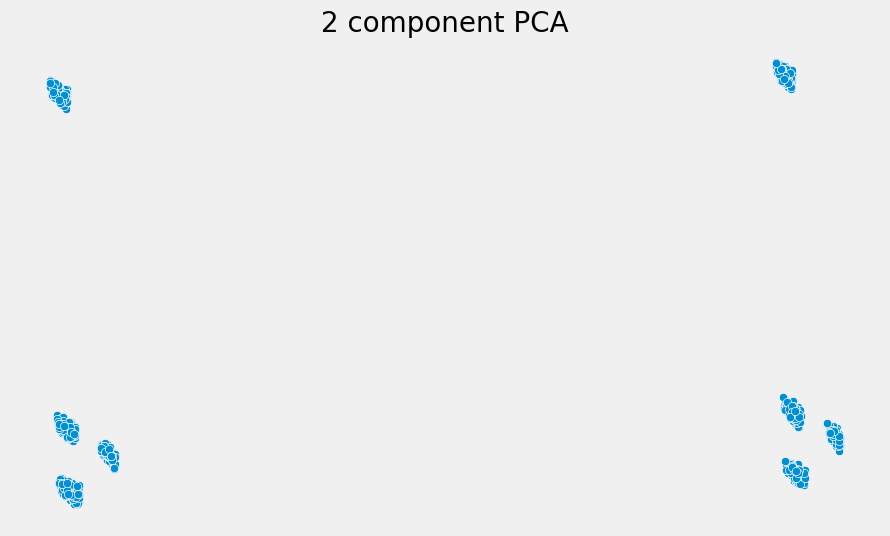

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=principaldtrina, x='principal component 1', y='principal component 2', ax=ax)

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.spines[:].set_visible(False)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize = 20)
plt.show()

# Elbow Method 

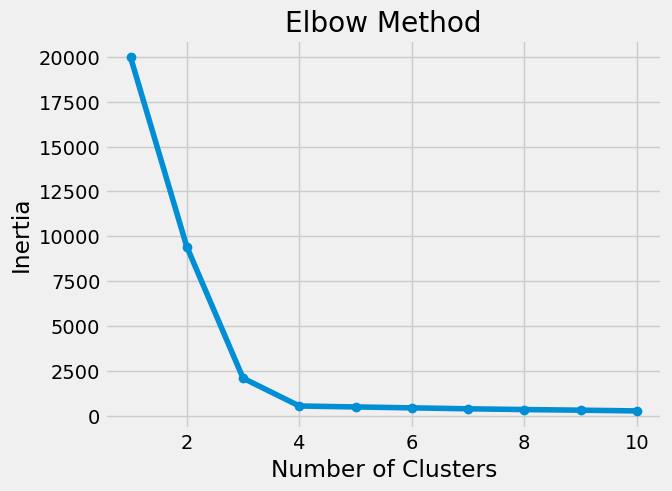

In [38]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate example data
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Elbow Method
def elbow_method(data, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    # Plot Elbow Method
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

# Apply Elbow Method to the example data
elbow_method(data)

# K-means clustering

In [39]:
model = KMeans(n_clusters=4,random_state=42)
model.fit(principalComponents)

KMeans(n_clusters=4, random_state=42)

In [40]:
labels = model.labels_

In [41]:
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

labels_mapping = [mapping[val] for val in labels]

In [42]:
dtrina['Clusters'] = labels_mapping
dtrina_copy['Clusters'] = labels_mapping
principaldtrina['Clusters'] = labels_mapping

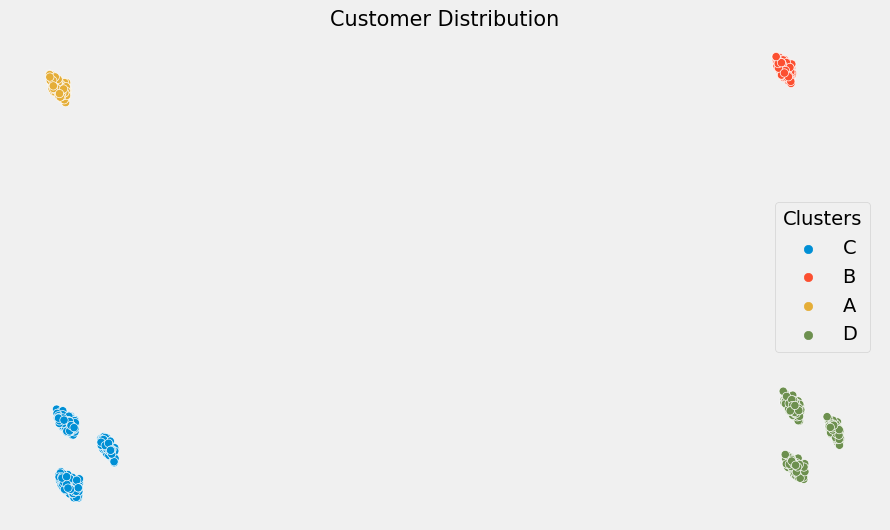

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=principaldtrina, x='principal component 1', y='principal component 2', hue='Clusters', ax=ax)

ax.set_title('Customer Distribution', fontsize=15)

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.spines[:].set_visible(False)

# Analisis Segmentasi 

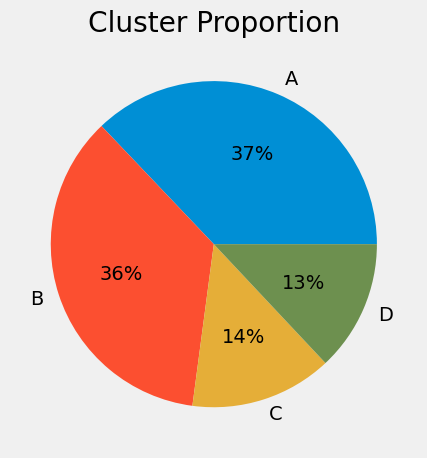

In [44]:
plt.pie(dtrina['Clusters'].value_counts(),autopct='%1.f%%',labels=['A','B','C','D'])
plt.title('Cluster Proportion')
plt.tight_layout()

In [45]:
dtrina.groupby('Clusters')['spending'].mean()

Clusters
A     9959.224929
B     9048.507500
C    10271.298254
D     9044.785364
Name: spending, dtype: float64

In [46]:
dtrina.groupby('Clusters')['income'].mean()

Clusters
A    60315.872340
B    61869.269231
C    58531.092179
D    58695.897574
Name: income, dtype: float64

Grafik di bawah ini menunjukkan
1. Kelompok C mempunyai pendapatan paling sedikit tetapi pengeluaran paling banyak
2. Kelompok B mempunyai pendapatan paling banyak namun pengeluaran paling sedikit

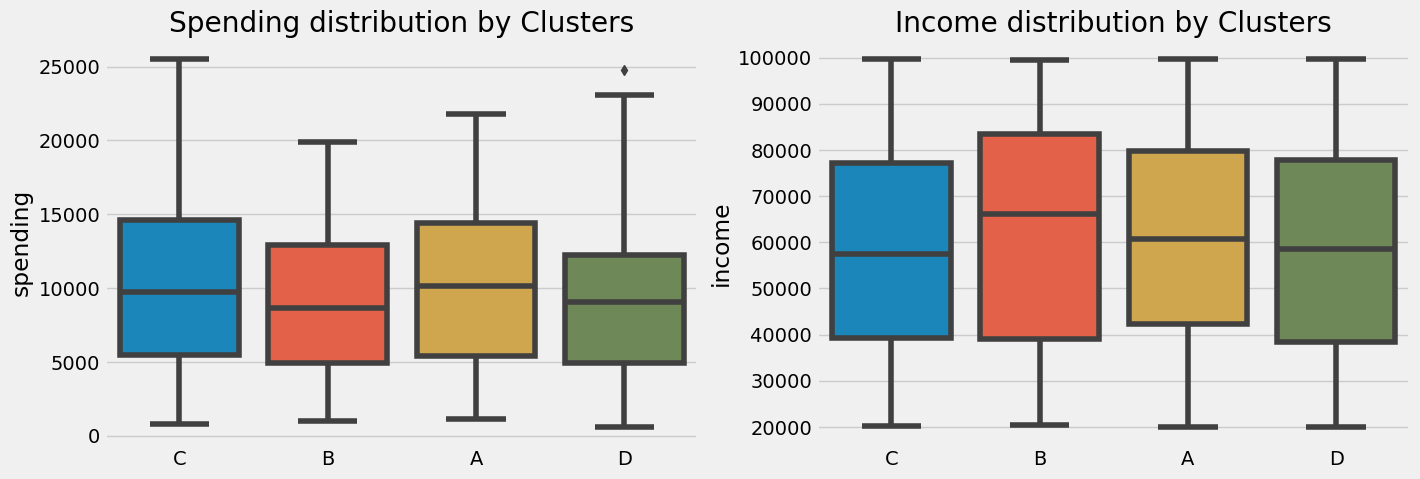

In [47]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(x='Clusters', y='spending', data=dtrina)
plt.xlabel('')
plt.title('Spending distribution by Clusters')

plt.subplot(1,2,2)
sns.boxplot(x='Clusters', y='income', data=dtrina)
plt.xlabel('')
plt.title('Income distribution by Clusters')
plt.show()

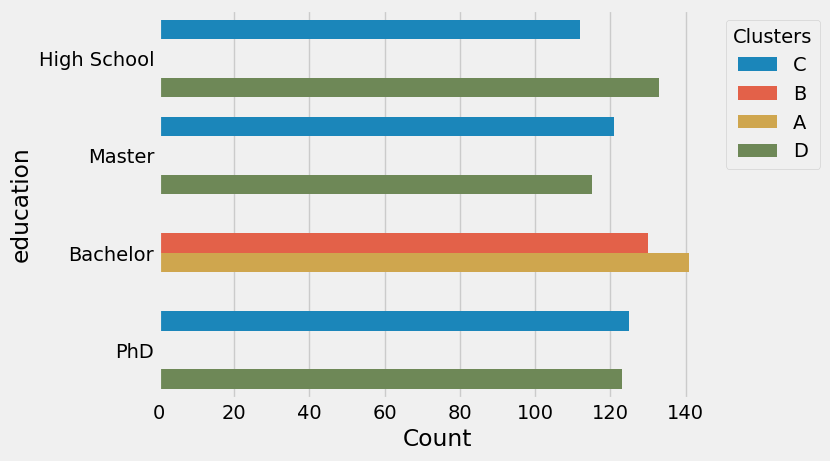

In [48]:
sns.countplot(data=dtrina, y='education', hue='Clusters')
plt.xlabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

1. Porsi perempuan (klaster C) paling banyak mengeluarkan uang dengan pendapatan paling sedikit
2. Porsi laki-laki (cluster B) mengeluarkan pengeluaran paling sedikit dengan jumlah pendapatan terbanyak

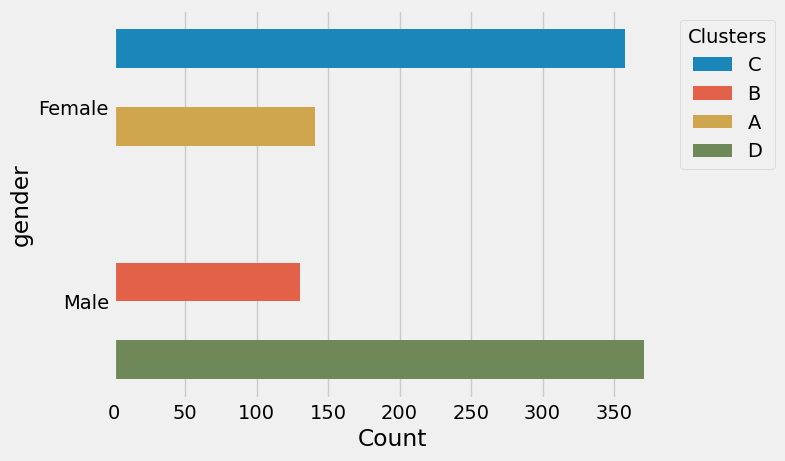

In [49]:
sns.countplot(data=dtrina, y='gender', hue='Clusters')
plt.xlabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

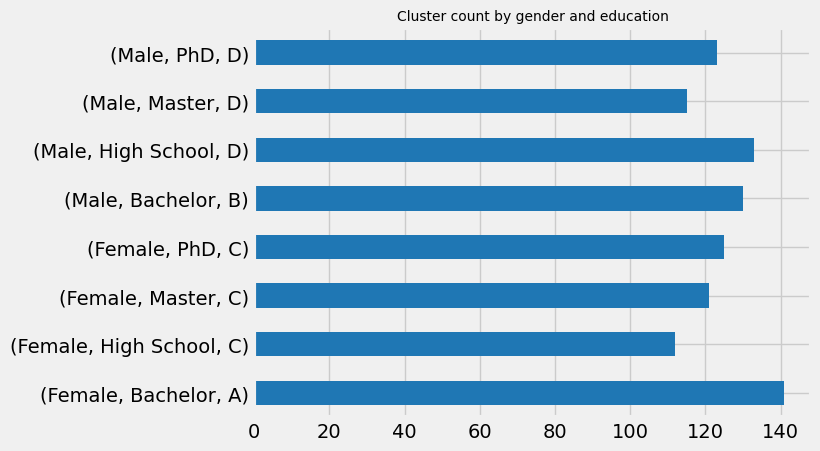

In [50]:
dtrina.groupby(['gender','education'])['Clusters'].value_counts().plot(kind='barh', color='#1f77b4')

plt.ylabel('')
plt.title('Cluster count by gender and education', fontsize=10)
plt.show()

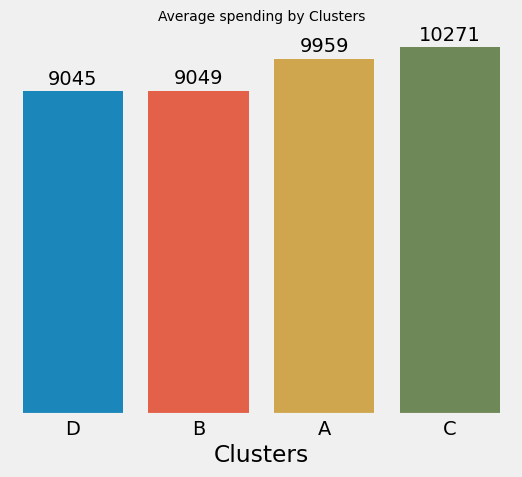

In [51]:
avg = dtrina.groupby('Clusters')['spending'].mean().to_frame().reset_index().sort_values(by=['spending'], ascending=True)

splot = sns.barplot(data = avg, x='Clusters', y='spending')
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='center',
                  xytext = (0,9),
                  textcoords = 'offset points')
plt.yticks([])
plt.ylabel('')
plt.xlabel('Clusters')
plt.title('Average spending by Clusters', fontsize=10)
plt.show()

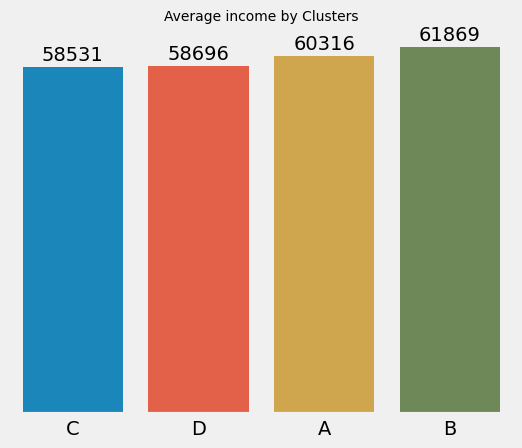

In [52]:
avg = dtrina.groupby('Clusters')['income'].mean().to_frame().reset_index().sort_values(by=['income'], ascending=True)

splot = sns.barplot(data = avg, x='Clusters', y='income')
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='center',
                  xytext = (0,9),
                  textcoords = 'offset points')
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.title('Average income by Clusters', fontsize=10)
plt.show()

Distribusi usia sangat luas di antara cluster kecuali cluster C
Cluster C umumnya lebih tua

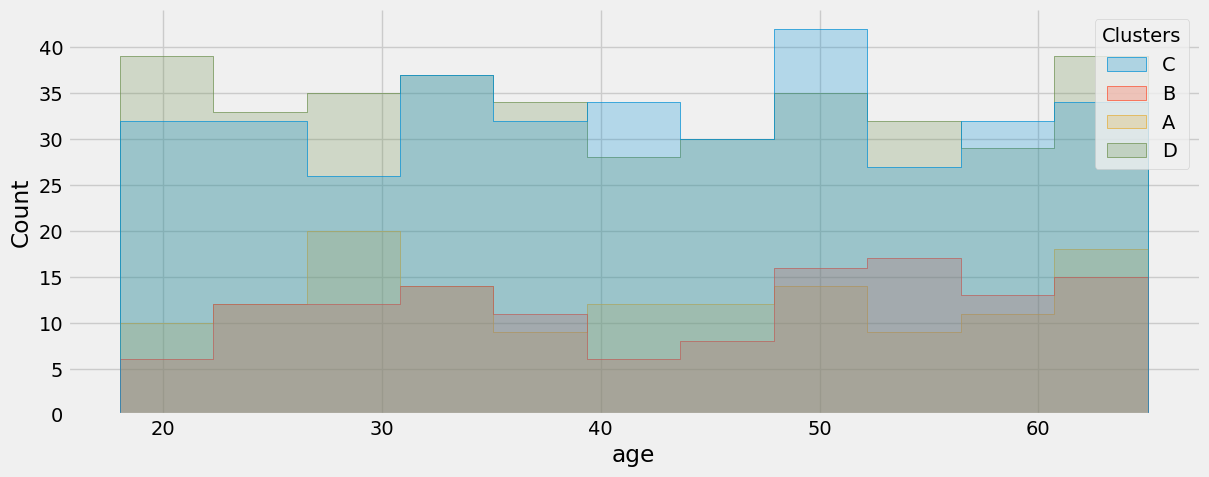

In [53]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.histplot(dtrina, x="age", hue="Clusters", element="step")
    
ax.spines[['top', 'right']].set_visible(False)

plt.show()

Kesimpulan

Saya telah mengidentifikasi bahwa kelompok C mempunyai pendapatan paling sedikit, namun membelanjakan uang paling banyak. Sebaliknya, kelompok B mempunyai pendapatan terbanyak, namun membelanjakan uang paling sedikit. Cluster C terdiri dari seluruh perempuan dengan berbagai jenis gelar (Sekolah Menengah Atas, Magister dan PhD, tetapi tidak Sarjana) dan Cluster B terdiri dari semua laki-laki dengan gelar Sarjana. 